## XOR演算を学習

In [1]:
from sklearn import svm

# XORの演算結果 --- (※1)
xor_data = [
    #P, Q, result
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]

# 学習させるためにデータとラベルに分ける --- (※2)
data = []
label = []
for row in xor_data:
    p = row[0]
    q = row[1]
    r = row[2]
    data.append([p, q])
    label.append(r)

# データの学習 --- (※3)
clf = svm.SVC()
clf.fit(data, label)

# データを予測 --- (※4)
pre = clf.predict(data)
print("予測結果:", pre)

# 正解と合っているか結果を確認 --- (※5)
ok = 0; total = 0
for idx, answer in enumerate(label):
    p = pre[idx]
    if p == answer: ok += 1
    total += 1
print("正解率:", ok, "/", total, "=", ok/total)

予測結果: [0 1 1 0]
正解率: 4 / 4 = 1.0


In [2]:
import pandas as pd
from sklearn import svm, metrics

# XORの演算結果
xor_input = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]
# 入力を学習データとラベルに分ける --- (※1)
xor_df = pd.DataFrame(xor_input)
xor_data  = xor_df.loc[:,0:1] # データ
xor_label = xor_df.loc[:,2]   # ラベル

# データの学習と予測 --- (※2)
clf = svm.SVC()
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)

# 正解率を求める --- (※3)
ac_score = metrics.accuracy_score(xor_label, pre)
print("正解率=", ac_score)

正解率= 1.0


## アヤメの分類

In [3]:
from sklearn import svm, metrics
import random, re

# アヤメのCSVデータを読み込む --- (※1)
csv = []
with open('file/iris.csv', 'r', encoding='utf-8') as fp:
    # 一行ずつ読む
    for line in fp:
        line = line.strip()    # 改行を削除
        cols = line.split(',') # カンマで区切る 
        # 文字列データを数値に変換
        fn = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
        cols = list(map(fn, cols))
        csv.append(cols)

# 先頭のヘッダ行を削除
del csv[0]

# データをシャッフル --- (※2)
random.shuffle(csv)

# 学習用とテスト用に分割する(2:1の比率) --- (※3)
total_len = len(csv)
train_len = int(total_len * 2 / 3)
train_data = []
train_label = []
test_data = []
test_label = []
for i in range(total_len):
    data  = csv[i][0:4]
    label = csv[i][4]
    if i < train_len:
        train_data.append(data)
        train_label.append(label)
    else:
        test_data.append(data)
        test_label.append(label)

# データを学習し、予測する --- (※4)
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

# 正解率を求める --- (※5)
ac_score = metrics.accuracy_score(test_label, pre)
print("正解率=", ac_score)

正解率= 0.98


In [4]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

# アヤメのCSVデータを読み込む --- (※1)
csv = pd.read_csv('file/iris.csv')

# 任意の列を取り出す --- (※2)
csv_data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
csv_label = csv["Name"]

# 学習用とテスト用に分割する --- (※3)
train_data, test_data, train_label, test_label = \
    train_test_split(csv_data, csv_label)

# データを学習し、予測する --- (※4)
clf = svm.SVC()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

# 正解率を求める --- (※5)
ac_score = metrics.accuracy_score(test_label, pre)
print("正解率=", ac_score)

正解率= 0.9473684210526315


## 文章判定

In [5]:
from sklearn import svm, metrics
import glob, os.path, re, json


# テキストを読んで出現頻度を調べる --- (※1)
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group()
    with open(fname, "r", encoding="utf-8") as f:
        text = f.read()
    text = text.lower() # 小文字に変換
    # カウンタを0に
    cnt = [0 for n in range(0, 26)]
    code_a = ord("a")
    code_z = ord("z")
    # アルファベットの出現回数を調べる --- (※2)
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z: # a-zの間なら
            cnt[n - code_a] += 1
    # 正規化する --- (※3)
    total = sum(cnt)
    freq = list(map(lambda n: n / total, cnt))
    return (freq, lang)
    
# 各ファイルを処理する
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {"freqs":freqs, "labels":labels}
    
data = load_files("./file/lang/train/*.txt")
test = load_files("./file/lang/test/*.txt")
# 今後のためにJSONで結果を保存
with open("./file/lang/freq.json", "w", encoding="utf-8") as fp:
    json.dump([data, test], fp)

# 学習 --- (※4)
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

# 予測 --- (※5)
predict = clf.predict(test["freqs"])

# 結果がどの程度合っていたか確認 --- (※6)
ac_score = metrics.accuracy_score(test["labels"], predict)
cl_report = metrics.classification_report(test["labels"], predict)
print("正解率=", ac_score)
print("レポート=")
print(cl_report)


正解率= 1.0
レポート=
              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



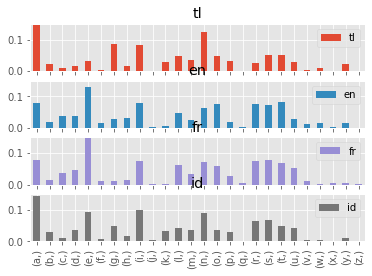

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# アルファベットの出現頻度データを読み込む --- (※1)
with open("./file/lang/freq.json", "r", encoding="utf-8") as fp:
    freq = json.load(fp)

# 言語ごとに集計する --- (※2)
lang_dic = {}
for i, lbl in enumerate(freq[0]["labels"]):
    fq = freq[0]["freqs"][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx] + v) / 2

# PandasのDataFrameにデータを入れる --- (※3)
asclist = [[chr(n) for n in range(97,97+26)]]
df = pd.DataFrame(lang_dic, index=asclist)

# プロット --- (※4)
plt.style.use('ggplot')
df.plot(kind="bar", subplots=True, ylim=(0,0.15))
plt.savefig("images/lang-plot.png")

In [7]:
from sklearn import svm 
# from sklearn.externals import joblib
import joblib
import json

# 各言語の頻出データ(JSON)を読み込む
with open("./file/lang/freq.json", "r", encoding="utf-8") as fp:
    d = json.load(fp)
    data = d[0]

# データを学習する
clf = svm.SVC()
clf.fit(data["freqs"], data["labels"])

# 学習データを保存する
joblib.dump(clf, "./file/freq.pkl")
print("ok")

ok


## SVM

In [8]:
import random

# BMIを計算して体型を返す
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "thin"
    if bmi < 25.0: return "normal"
    return "fat"

# 出力ファイルの準備
fp = open("file/bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\r\n")

# ランダムなデータを生成
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))
fp.close()
print("ok,", cnt)

ok, {'thin': 6371, 'normal': 5802, 'fat': 7827}


In [9]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 身長・体重データの読み込み --- (※1)
tbl = pd.read_csv("file/bmi.csv")

# カラム(列)をスライスして正規化 --- (※2)
label = tbl["label"]
w = tbl["weight"] / 100 # 最大100kgと考える
h = tbl["height"] / 200 # 最長200cmと考える
wh = pd.concat([w, h], axis=1)

# 学習用とテスト用データに分ける --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(wh, label)

# データを学習 --- (※4)
clf = svm.SVC()
clf.fit(data_train, label_train)

# データを予測 --- (※5)
predict = clf.predict(data_test)

# 合っているか結果を確認 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("正解率=", ac_score)
print("レポート=\n", cl_report)

正解率= 0.9948
レポート=
               precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1975
      normal       0.99      0.99      0.99      1472
        thin       0.99      1.00      1.00      1553

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



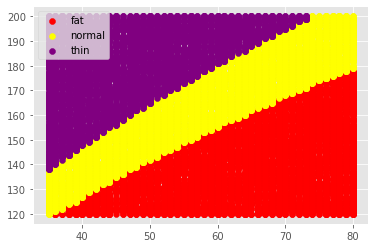

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# PandasでCSVファイルを読む
tbl = pd.read_csv("file/bmi.csv", index_col=2)

# 描画を開始する
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# サブプロット用 - 指定のラベルを任意の色で描画
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)

scatter("fat",    "red")
scatter("normal", "yellow")
scatter("thin",   "purple")

ax.legend() 
plt.savefig("images/bmi-test.png")
# plt.show()

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# データの読み込み --- (※1)
mr = pd.read_csv("file/mushroom.csv", header=None)

# データ中の記号を数値に変換する --- (※2)
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    row_data = []
    for v in row.loc[1:]:
        row_data.append(ord(v))
    data.append(row_data)

# 学習用とテスト用データに分ける --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(data, label)

# データの学習 --- (※4)
clf = RandomForestClassifier()
clf.fit(data_train, label_train)

# データを予測 --- (※5)
predict = clf.predict(data_test)

# 合っているか結果を確認 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("正解率=", ac_score)
print("レポート=\n", cl_report)

正解率= 1.0
レポート=
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1052
           p       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# データの読み込み
mr = pd.read_csv("file/mushroom.csv", header=None)

# データ中の分類変数を展開する
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    exdata = []
    for col, v in enumerate(row.loc[1:]):
        if row_index == 0:
            attr = {"dic": {}, "cnt":0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        # キノコの特徴を表す記号を12列で表す
        d = [0,0,0,0,0,0,0,0,0,0,0,0]
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
        d[idx] = 1
        exdata += d
    data.append(exdata)


# 学習用とテスト用データに分ける
data_train, data_test, label_train, label_test = \
    train_test_split(data, label)
#データの学習
clf = RandomForestClassifier()
clf.fit(data_train, label_train)
# データを予測
predict = clf.predict(data_test)
# 合っているか結果を確認
ac_score = metrics.accuracy_score(label_test, predict)
print("正解率=", ac_score)

正解率= 1.0


## クロスバリデーション
1. 集合Xを、AとBとCに分割。
2. Aをテストデータ、残りのB/Cを訓練データとして分割精度s1を求める。
3. Bをテストデータ、残りのA/Cを訓練データとして分割精度s2を求める。
4. Cをテストデータ、残りのA/Bを訓練データとして分割精度s3を求める。
5. 分割精度s1/s2/s3の平均を求め分割精度とする。

In [13]:
from sklearn import svm, metrics
import random, re

# アヤメのCSVデータを読み込む --- (※1)
lines = open('file/iris.csv', 'r', encoding='utf-8').read().split("\n")
f_tonum = lambda n : float(n) if re.match(r'^[0-9\.]+$', n) else n
f_cols  = lambda li: list(map(f_tonum,li.strip().split(',')))
csv = list(map(f_cols, lines))
del csv[0] # 先頭のヘッダ行を削除
random.shuffle(csv) # データをシャッフル

# データをK分割する --- (※2)
K = 5 
csvk = [ [] for i in range(K) ]
for i in range(len(csv)):
    csvk[i % K].append(csv[i])

# リストを訓練データとラベルに分割する関数
def split_data_label(rows):
    data = []; label = []
    for row in rows:
        data.append(row[0:4])
        label.append(row[4])
    return (data, label)

# 正解率を求める --- (※3)
def calc_score(test, train):
    test_f, test_l = split_data_label(test)
    train_f, train_l = split_data_label(train)
    # 区連データを学習して分類して正解率を求める
    clf = svm.SVC()
    clf.fit(train_f, train_l)
    pre = clf.predict(test_f)
    return metrics.accuracy_score(test_l, pre)

# K分割したデータについて正解率を求める --- (※4)
score_list = []
for testc in csvk:
    # testc以外のデータを訓練データとする
    trainc = []
    for i in csvk:
        if i != testc: trainc += i
    sc = calc_score(testc, trainc)
    score_list.append(sc)
print("各正解率=", score_list)
print("平均正解率=", sum(score_list) / len(score_list))

各正解率= [1.0, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0]
平均正解率= 0.9666666666666668


In [14]:
import pandas as pd
from sklearn import svm, metrics, model_selection
import random, re

# アヤメのCSVデータを読み込む --- (※1)
csv = pd.read_csv('file/iris.csv')

# リストを訓練データとラベルに分割する --- (※2)
data = csv[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
label = csv["Name"]

# クロスバリデーションを行う --- (※3)
clf = svm.SVC()
scores = model_selection.cross_val_score(
	clf, data, label, cv=5)
print("各正解率=", scores)
print("正解率=", scores.mean())

各正解率= [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
正解率= 0.9666666666666666


## グリッドサーチ

In [15]:
# import pandas as pd
# from sklearn import model_selection, svm, metrics

# # MNISTの学習データを読み込む --- (※1)
# train_csv = pd.read_csv("./mnist/train.csv")
# test_csv  = pd.read_csv("./mnist/t10k.csv")

# # 必要な列を抽出 --- (※2)
# train_label = train_csv.iloc[:, 0]
# train_data  = train_csv.iloc[:, 1:577]
# test_label  = test_csv.iloc[:, 0]
# test_data   = test_csv.iloc[:, 1:577]
# print("学習データ数=", len(train_label))

# # グリッドサーチのパラメータを設定 --- (※3)
# params = [
#     {"C": [1,10,100,1000], "kernel":["linear"]},
#     {"C": [1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}
# ]

# # グリッドサーチを行う --- (※4)
# clf = model_selection.GridSearchCV(
#         svm.SVC(), params, n_jobs=-1)
# clf.fit(train_data, train_label)
# print("学習器=", clf.best_estimator_)

# # テストデータで確認 --- (※5)
# pre = clf.predict(test_data)
# ac_score = metrics.accuracy_score(pre, test_label)
# print("正解率=",ac_score)